# Emulation running from notebook

In [98]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import some library pieces

In [99]:
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults

plot_defaults()

In [100]:
# six degrees of freedom search
from src.models.emu6d import SixDOFSearch

## Run 6D with fake function to generate hold out set

In [101]:
# Two degrees of freedom search [bearing and position]
from src.models.emulation import EmulationSmash

In [125]:
## Let's see if the six degrees of freedom search works
tf  = SixDOFSearch(dryrun=True, path="FakeTest", test_data_path="None", seed=0)
tf.run_initial(samples=1000)
tf.setup_active()
tf.run_active(1)
tf.save_initial_data()
# tf.save_real()


Sweep, dryrun=True: 100%|██████████| 1000/1000 [00:00<00:00, 5329.92it/s]
 /Users/simon/new-orleans/env/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [126]:
tf  = SixDOFSearch(dryrun=True, path="Test", test_data_path="FakeTest", seed=0)
tf.load_test_data()

loading data from /Users/simon/new-orleans/data/FakeTest


In [127]:
tf.test_x_data

array([[7.23500013e-01, 3.47499996e-01, 2.91500002e-01, 8.53500009e-01,
        8.88499975e-01, 6.23499990e-01],
       [9.40500021e-01, 7.82500029e-01, 5.16499996e-01, 8.81500006e-01,
        6.34500027e-01, 8.56500030e-01],
       [5.45499980e-01, 5.00000024e-04, 3.72500002e-01, 9.54999998e-02,
        7.79500008e-01, 6.50000013e-03],
       ...,
       [2.43499994e-01, 4.90500003e-01, 3.70499998e-01, 2.74500012e-01,
        1.67500004e-01, 3.66499990e-01],
       [5.00000024e-04, 2.00499997e-01, 8.57500017e-01, 1.90500006e-01,
        8.01500022e-01, 8.42499971e-01],
       [3.63003886e-02, 1.45794354e-01, 3.10069501e-01, 9.98625690e-01,
        2.66997147e-02, 9.08617722e-02]])

In [134]:
df = tf.load_real_df(data_path=tf.test_data_path) # ")

### Plot Test Hold out set in 6D with real units

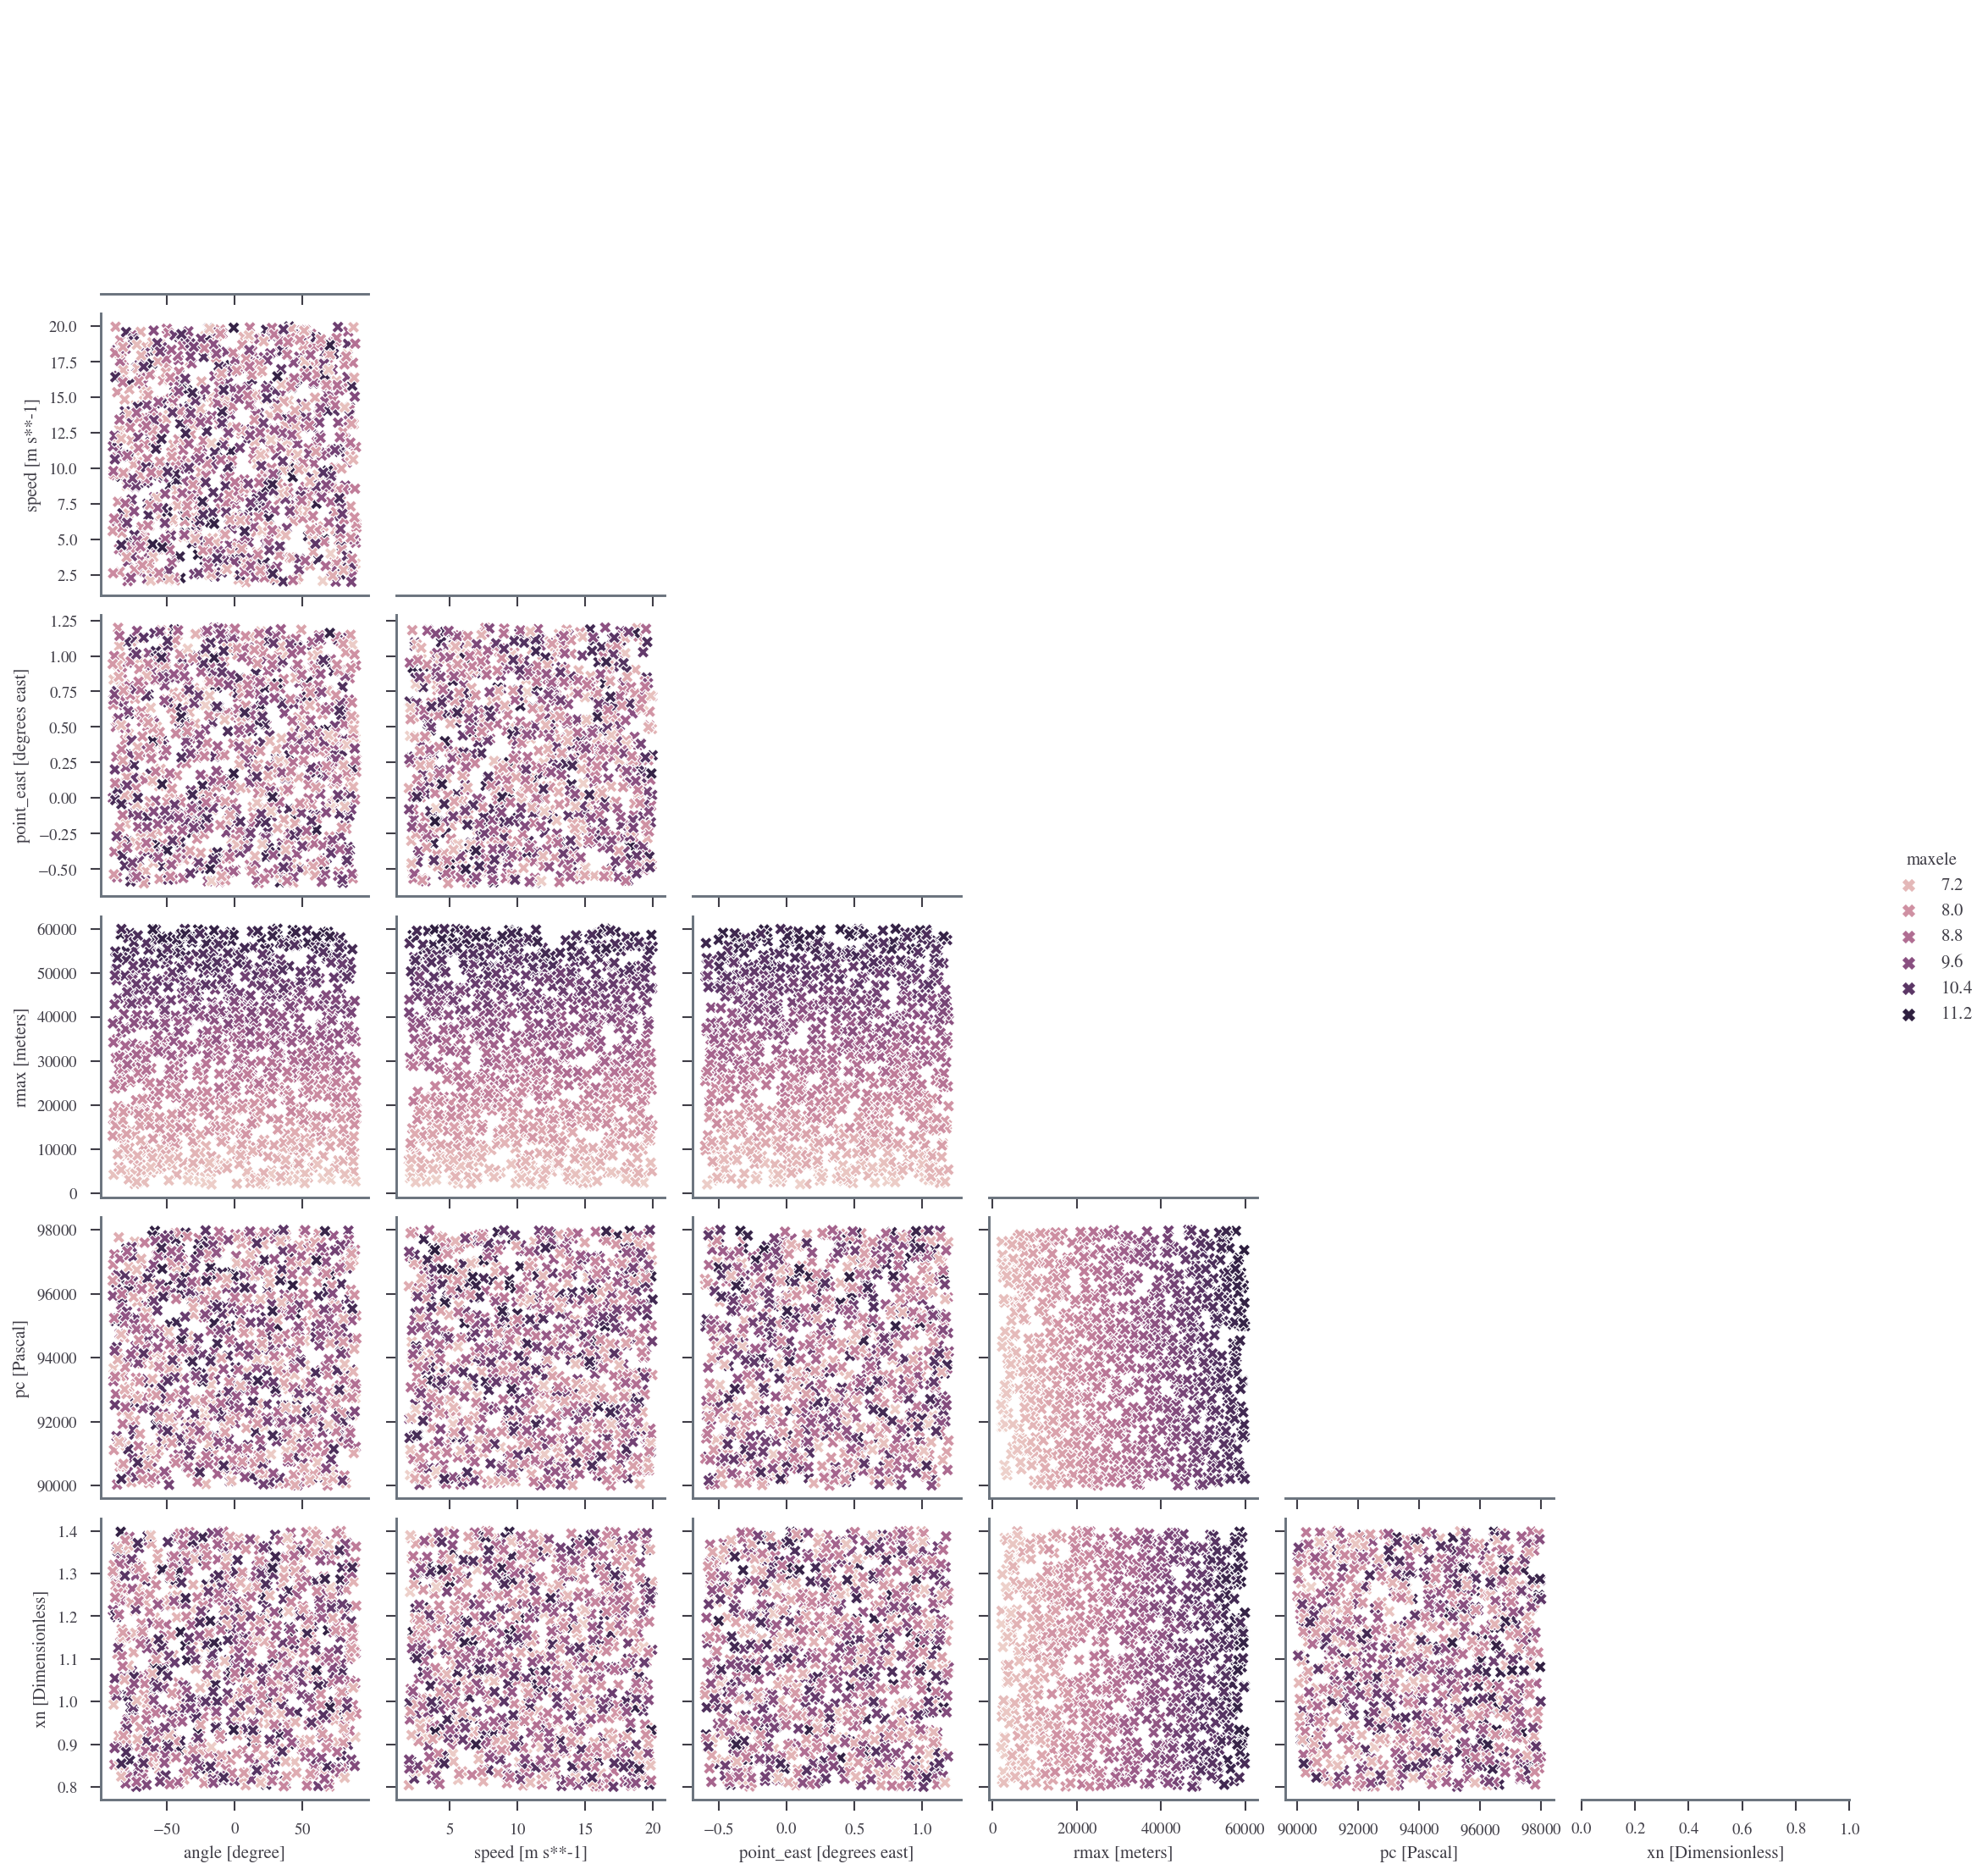

In [136]:
import seaborn as sns
sns.pairplot(df, hue="maxele", corner=True)

In [ ]:
tf  = SixDOFSearch(dryrun=True, path="TestHoldout6D", seed=100)
tf.run_initial(samples=1000)
tf.setup_active()
tf.save_initial_data()

Sweep, dryrun=True: 100%|██████████| 1000/1000 [00:00<00:00, 4938.76it/s]


## Implement verification curves: include WandB call?

In [ ]:
ds = tf.load_real_data()

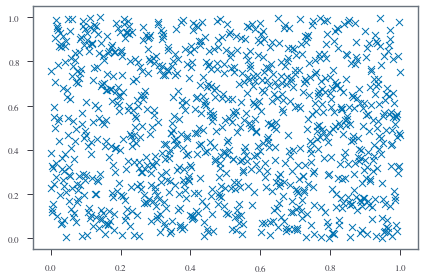

In [ ]:
plt.scatter(tf.test_x_data[:,0], tf.test_x_data[:,1], marker='x')

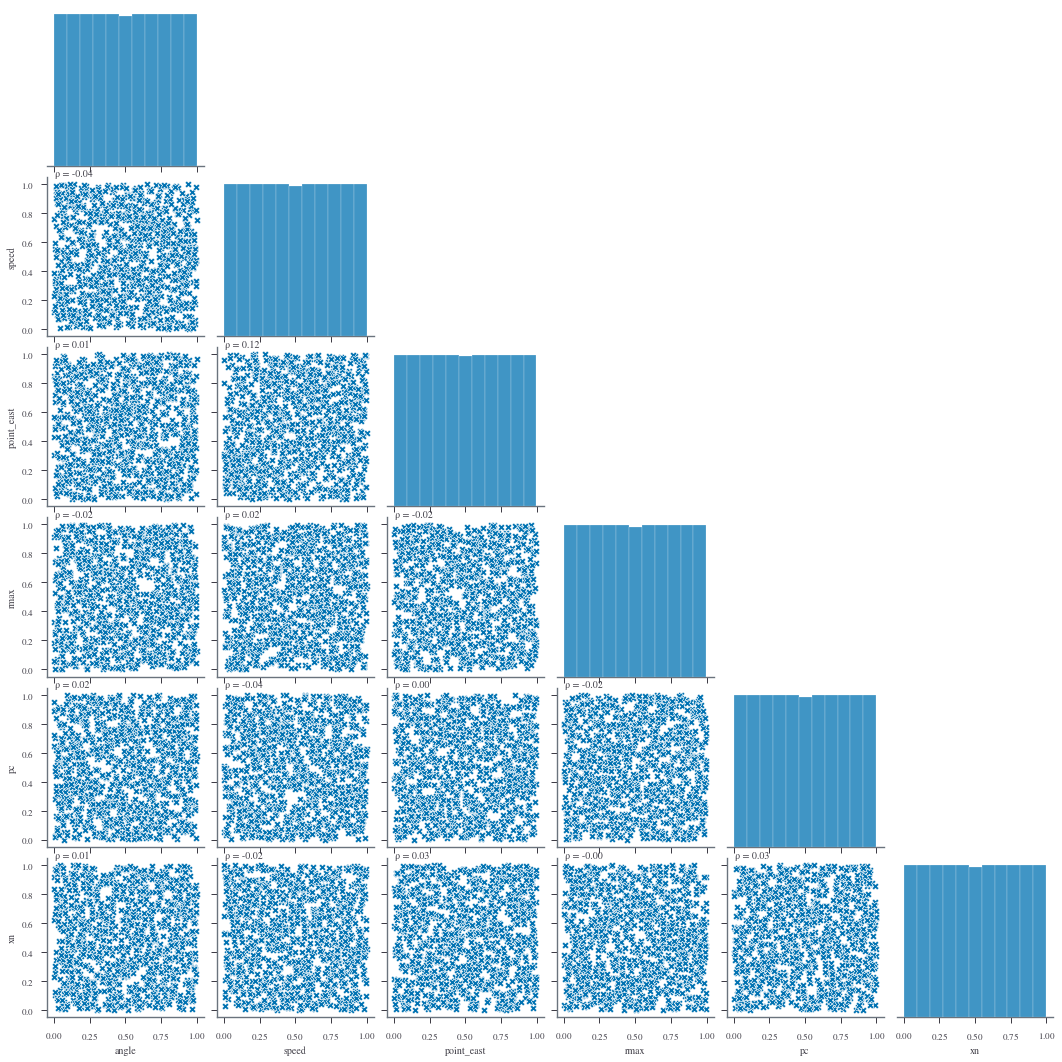

In [ ]:
from sithom.plot import pairplot
import pandas as pd
pairplot(pd.DataFrame(tf.test_x_data, columns=tf.names))

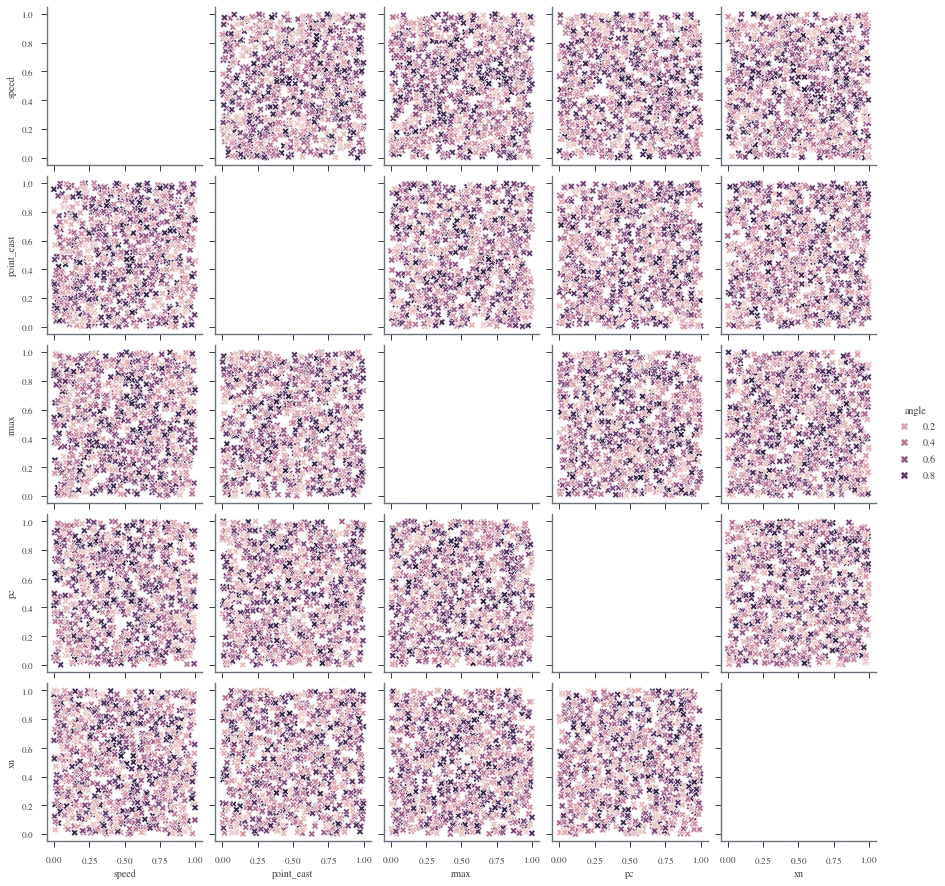

In [ ]:
import seaborn as sns
sns.pairplot(pd.DataFrame(tf.test_x_data, columns=tf.names),hue='angle')

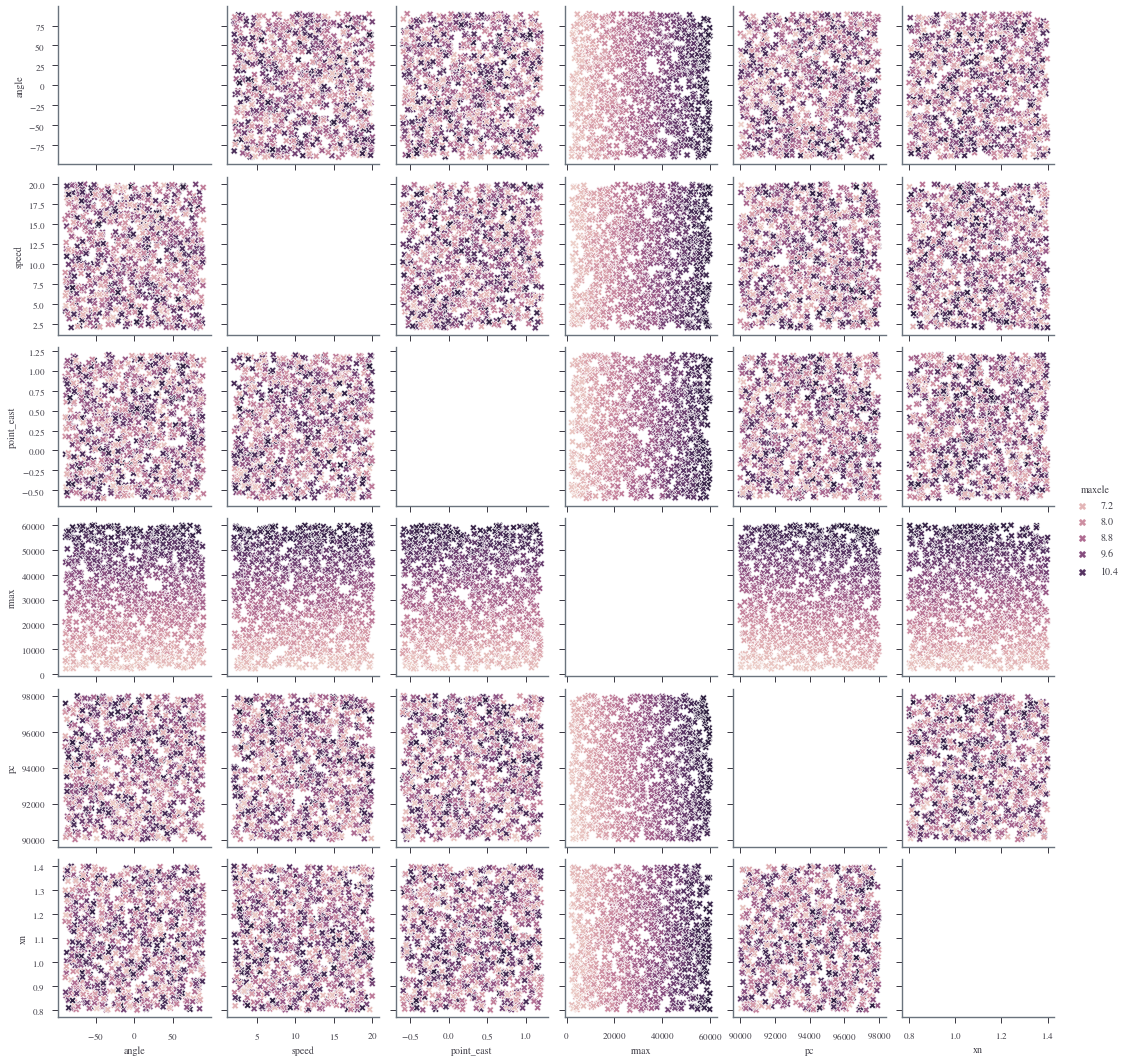

In [ ]:
sns.pairplot(tf.load_real_data().to_dataframe(), hue='maxele')

In [ ]:
ds

<xarray.Dataset>
Dimensions:     (point: 1000)
Coordinates:
  * point       (point) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    angle       (point) float64 89.73 39.15 25.29 -33.57 ... 78.21 -39.87 79.65
    speed       (point) float64 10.42 3.611 14.7 3.935 ... 17.87 17.44 19.97
    point_east  (point) float64 -0.5415 0.8013 -0.4767 ... 0.7761 -0.5991 0.7365
    rmax        (point) float64 2.291e+04 3.294e+04 ... 8.235e+03 4.478e+04
    pc          (point) float64 9.434e+04 9.608e+04 ... 9.708e+04 9.325e+04
    xn          (point) float64 1.202 1.021 0.8291 ... 1.244 0.8477 0.9101
    maxele      (point) float64 8.386 9.223 7.417 8.218 ... 8.9 8.995 7.53 9.87
Attributes:
    description:  Data.

In [ ]:
data = ds.to_array().values
xr = data[:-1]
yr = data[-1:]
X, Y = tf.to_normalized(xr.T), -yr.T

In [ ]:
xr.shape

(6, 1000)

In [ ]:
yr.shape

(1, 1000)

In [ ]:
X.shape

(1000, 6)

In [ ]:
Y.shape

(1000, 1)

In [ ]:
import emukit

In [ ]:
for i in ds:
    print(i, type(i), type(ds[i]))

angle <class 'str'> <class 'xarray.core.dataarray.DataArray'>
speed <class 'str'> <class 'xarray.core.dataarray.DataArray'>
point_east <class 'str'> <class 'xarray.core.dataarray.DataArray'>
rmax <class 'str'> <class 'xarray.core.dataarray.DataArray'>
pc <class 'str'> <class 'xarray.core.dataarray.DataArray'>
xn <class 'str'> <class 'xarray.core.dataarray.DataArray'>
maxele <class 'str'> <class 'xarray.core.dataarray.DataArray'>
